In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Read data
bank_data = pd.read_csv(filepath_or_buffer="bank-additional-full.csv", delimiter=';')

In [3]:
# Drop rows if these 5 columns contains unknown job	marital	education
# default(has credit in default?)	housing(has housing loan?)	loan(has personal loan?)
bank_data = bank_data[(bank_data['job'] != 'unknown')
                      & (bank_data['marital'] != 'unknown')
                      & (bank_data['education'] != 'unknown')
                      & (bank_data['default'] != 'unknown')
                      & (bank_data['housing'] != 'unknown')
                      & (bank_data['loan'] != 'unknown')]

In [4]:
# visualization (understanding the data by parts)
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

Text(0.5, 0.98, 'Histogram of Age by Y and marital')

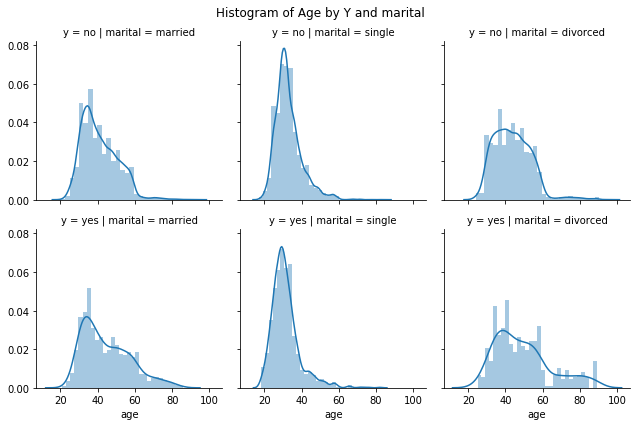

In [5]:
g = sns.FacetGrid(bank_data, col='marital' ,row='y')
g = g.map(sns.distplot, 'age', bins=30)
plt.subplots_adjust(top=0.9)
# g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Histogram of Age by Y and marital')

(13.1, 98.9)

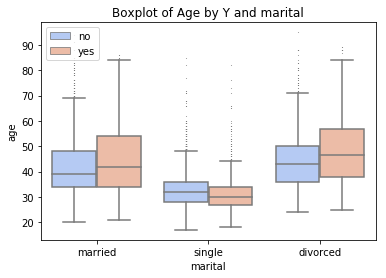

In [6]:
sns.boxplot(x='marital', y='age', hue='y', data=bank_data, palette='coolwarm',fliersize=0.2)
ax = plt.gca()
ax.set_title('Boxplot of Age by Y and marital')
ax.legend(loc = 2)
ax.get_ylim()

Text(0.5, 1.0, 'Mosaic plot of job by y')

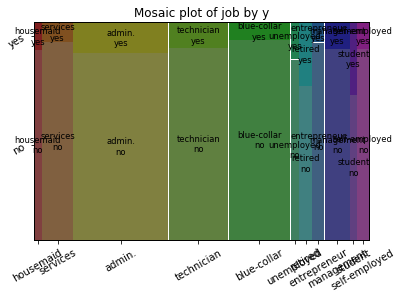

In [7]:
mosaic(bank_data, ['job','y'], gap=0.001, label_rotation=30)
ax = plt.gca()
ax.set_title('Mosaic plot of job by y')

Text(0.5, 1.0, 'Mosaic plot of housing(x) and loan(y)')

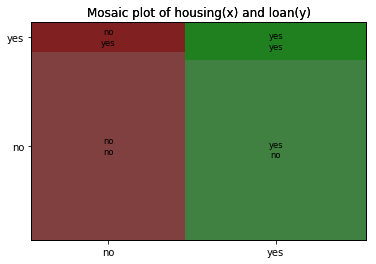

In [8]:
mosaic(bank_data, ['housing','loan'], gap=0.001, title='Mosaic plot of housing(x) and loan(y)')
ax = plt.gca()
ax.set_title('Mosaic plot of housing(x) and loan(y)')

Text(0.5, 1.0, 'Mosaic plot of housing(x) and loan(y)')

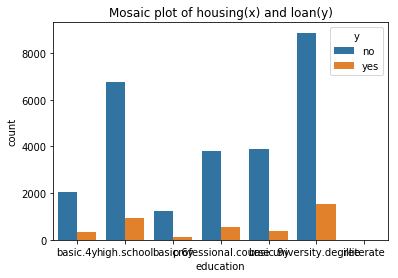

In [9]:
sns.countplot(x='education', data=bank_data, hue='y')
ax = plt.gca()
ax.set_title('Mosaic plot of housing(x) and loan(y)')

Text(0.5, 1.0, 'Count plot of marital and y')

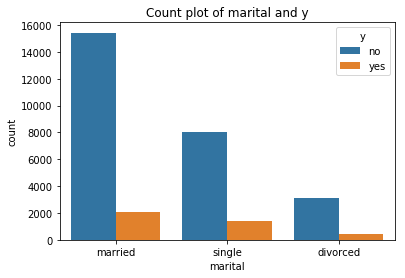

In [10]:
sns.countplot(x='marital', data=bank_data, hue='y')
ax = plt.gca()
ax.set_title('Count plot of marital and y')

Text(0.5, 1.0, 'Count plot of job and y')

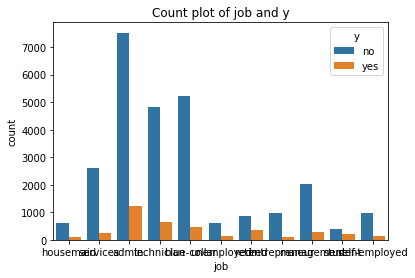

In [11]:
sns.countplot(x='job', data=bank_data, hue='y')
ax = plt.gca()
ax.set_title('Count plot of job and y')

Text(0.5, 1.0, 'violin plot of contact by age and y')

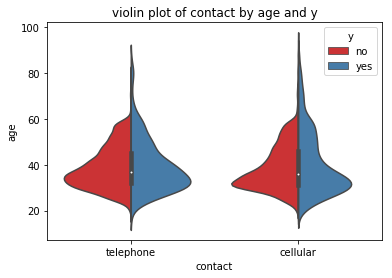

In [12]:
sns.violinplot(x="contact", y="age", data=bank_data ,hue='y',split=True,palette='Set1')
ax = plt.gca()
ax.set_title('violin plot of contact by age and y')

Text(0.5, 1.0, 'Mosaic plot of month(x) and day_of_week(y) by y')

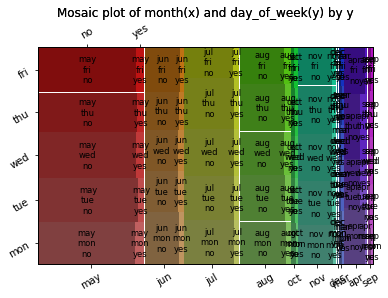

In [13]:
mosaic(bank_data, ['month','day_of_week','y'], gap=0.001, label_rotation=30, title='Mosaic plot of month(x) and day_of_week(y) by y')
ax = plt.gca()
ax.set_title('Mosaic plot of month(x) and day_of_week(y) by y')

Text(0.5, 1.0, 'Regression plot of age against duration by y')

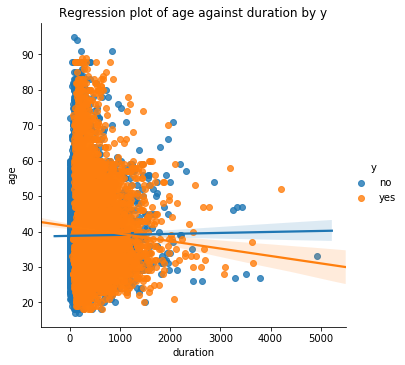

In [14]:
sns.lmplot(x='duration',y='age',data=bank_data ,hue='y')
ax = plt.gca()
ax.set_title('Regression plot of age against duration by y')

(0, 3000)

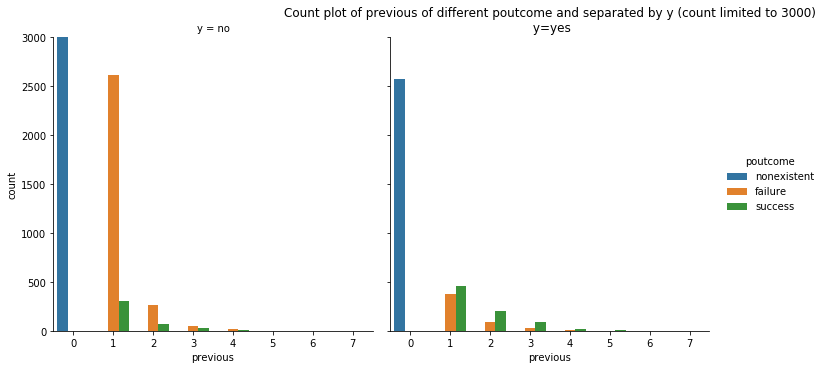

In [15]:
sns.catplot(x="previous", col="y",hue='poutcome' ,data=bank_data, kind="count")
ax = plt.gca()
ax.set_title('Count plot of previous of different poutcome and separated by y (count limited to 3000)\n y=yes')
ax.set_ylim(0,3000)

Text(0.5, 1.0, 'HeatMap of emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed')

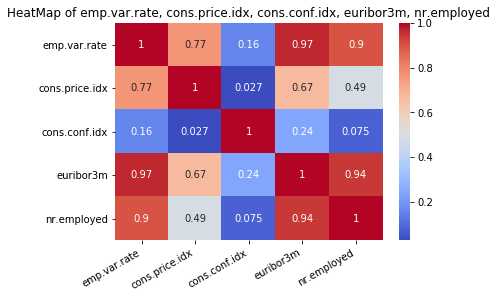

In [16]:
sns.heatmap(bank_data.iloc[:,15:20].corr(),cmap='coolwarm',annot=True)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('HeatMap of emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed')

Text(0.5, 0.98, 'Pair plot of emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed')

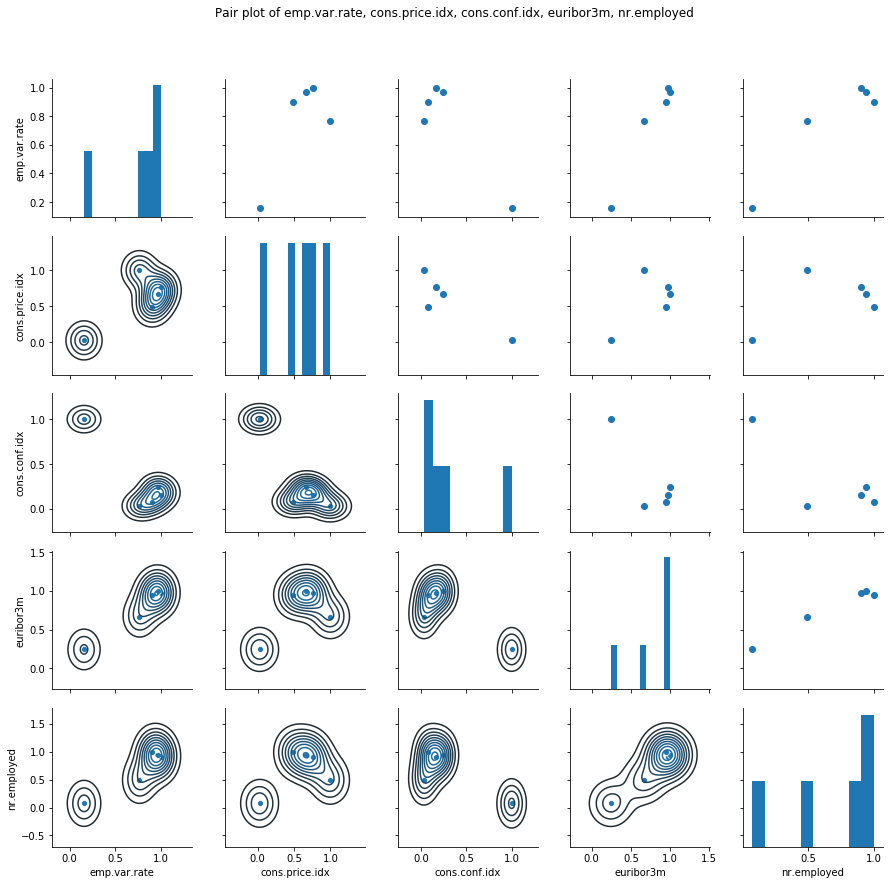

In [17]:
g = sns.pairplot(bank_data.iloc[:,15:20].corr())
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pair plot of emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed')

In [ ]:
# Data Preprocessing(categorical, binary, ordinal encoding)-----------------
# Ordinal encoding-- education
edu_mapping = {label:idx for idx, label in enumerate(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
    'high.school',  'professional.course', 'university.degree'])}
print(edu_mapping)
bank_data['education']  = bank_data['education'].map(edu_mapping)

# Label encoding pdays
bank_data['pdays'] = (bank_data['pdays'] >998).astype(int)

# Label encoding y(independent variable)
bank_data['y'].replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:
# One hot encoding and filling in missing values if missing values is present
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
cat_si_step = ('si', SimpleImputer(strategy='constant',fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_cols = [1,2,4,5,6,7,8,9,14] #removed education
cat_transformers = [('cat', cat_pipe, cat_cols)]

In [ ]:
# remainder should be passthrough so that the numerical columns also included in the result
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=cat_transformers,remainder='passthrough')

X_cat_transformed = ct.fit_transform(bank_data.iloc[:,:])
X_cat_transformed.shape

pl = ct.named_transformers_['cat']
ohe = pl.named_steps['ohe']
# showing the columns name after encoding
a = ohe.get_feature_names()
cat_col_names = a.tolist()

In [ ]:
#Add back the column names
ncol_name = cat_col_names + ["age","education","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]
bank_data_final = pd.DataFrame(data=X_cat_transformed[:,:],columns=ncol_name)

# drop columns to prevent dummy variable trap
bank_data_final.drop(['x0_unemployed','x1_single','x2_no','x3_no','x4_no','x5_telephone','x6_sep','x7_wed','x8_success'],axis = 1,inplace = True)
# export the bank_data_final csv
# bank_data_final.to_csv('bank-additional-full-final.csv')

In [ ]:
# visualize correlations between columns and ready for machine learning(without feature scaling)
bank_data_final_corr = bank_data_final.corr()
bank_data_final_corr['y']

sns.heatmap(bank_data_final_corr, cmap='coolwarm', linecolor='white', linewidths=1)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('Correlation of the all features and output')

In [ ]:
# Feature Engineering-----------------
X = bank_data_final.iloc[:, 0:42].values
y = bank_data_final.iloc[:, 42].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling for numerical attributes only
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train[:, np.r_[31, 33:41]] = sc.fit_transform(X_train[:, np.r_[31, 33:41]])
# X_test[:, np.r_[31, 33:41]] = sc.transform(X_test[:, np.r_[31, 33:41]])
X_train[:, 31:42] = sc.fit_transform(X_train[:, 31:42])
X_test[:,31:42] = sc.transform(X_test[:, 31:42])

# Solving imbalance output problem(accuracy paradox) by oversampling
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

In [ ]:
# Dimension Reduction (Execute one of three each time)

# # Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train_PCA = pca.fit_transform(X_train)
# X_test_PCA = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.transform(X_test)

# # Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 2, kernel = 'rbf')
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)


In [ ]:
# Fitting Models to the training set
classifier = []
# Fitting Logistic Regression to the Training set with weighting
from sklearn.linear_model import LogisticRegression
classifier.append(LogisticRegression(random_state = 0, class_weight={0:0.4, 1:0.6}))
classifier[0].fit(X_train_LDA, y_train)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier.append(DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
classifier[1].fit(X_train, y_train)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier.append(GaussianNB())
classifier[2].fit(X_train_LDA, y_train)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier.append(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))
classifier[3].fit(X_train_LDA, y_train)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier.append(SVC(kernel = 'linear', random_state = 0))
classifier[4].fit(X_train_LDA, y_train)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier.append(SVC(kernel = 'rbf', random_state = 0))
classifier[5].fit(X_train_LDA, y_train)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier.append(RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0))
classifier[6].fit(X_train, y_train)


In [ ]:
# Fitting Artificial Neural Network to the Training set
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialising the ANN
classifier.append(Sequential())
# Adding the input layer and the first hidden layer
classifier[7].add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 42))
# Adding the second hidden layer
classifier[7].add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier[7].add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier[7].compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier[7].fit(X_train, y_train, batch_size = 10, epochs = 10)

In [ ]:
# Predicting the Test set results
y_pred = []
y_pred.append(classifier[0].predict(X_test_LDA))
y_pred.append(classifier[1].predict_proba(X_test)[:, 1] > 0.3)
y_pred.append(classifier[2].predict(X_test_LDA))
y_pred.append(classifier[3].predict(X_test_LDA))
y_pred.append(classifier[4].predict(X_test_LDA))
y_pred.append(classifier[5].predict(X_test_LDA))
y_pred.append(classifier[6].predict_proba(X_test)[:, 1] > 0.3)
y_pred.append(classifier[7].predict(X_test) > 0.3)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = []
for x in range(0,len(y_pred)):
    cm.append(confusion_matrix(y_test, y_pred[x]))
    print(cm[x])

In [ ]:
# Making classification_report
from sklearn.metrics import classification_report
for x in range(0,len(y_pred)):
    print(x)
    print(classification_report(y_test, y_pred[x]))